Games Source - EliteBarbs13 Chess.com Archive
{"archives":["https://api.chess.com/pub/player/elitebarbs13/games/2017/09","https://api.chess.com/pub/player/elitebarbs13/games/2019/10","https://api.chess.com/pub/player/elitebarbs13/games/2019/11","https://api.chess.com/pub/player/elitebarbs13/games/2019/12","https://api.chess.com/pub/player/elitebarbs13/games/2020/01","https://api.chess.com/pub/player/elitebarbs13/games/2020/02","https://api.chess.com/pub/player/elitebarbs13/games/2020/03","https://api.chess.com/pub/player/elitebarbs13/games/2020/04","https://api.chess.com/pub/player/elitebarbs13/games/2020/05","https://api.chess.com/pub/player/elitebarbs13/games/2020/06","https://api.chess.com/pub/player/elitebarbs13/games/2020/07","https://api.chess.com/pub/player/elitebarbs13/games/2020/08","https://api.chess.com/pub/player/elitebarbs13/games/2020/10","https://api.chess.com/pub/player/elitebarbs13/games/2021/01","https://api.chess.com/pub/player/elitebarbs13/games/2021/02","https://api.chess.com/pub/player/elitebarbs13/games/2021/06","https://api.chess.com/pub/player/elitebarbs13/games/2021/08","https://api.chess.com/pub/player/elitebarbs13/games/2021/09","https://api.chess.com/pub/player/elitebarbs13/games/2021/10","https://api.chess.com/pub/player/elitebarbs13/games/2021/11","https://api.chess.com/pub/player/elitebarbs13/games/2021/12","https://api.chess.com/pub/player/elitebarbs13/games/2022/01","https://api.chess.com/pub/player/elitebarbs13/games/2022/02","https://api.chess.com/pub/player/elitebarbs13/games/2022/03","https://api.chess.com/pub/player/elitebarbs13/games/2022/04","https://api.chess.com/pub/player/elitebarbs13/games/2022/05","https://api.chess.com/pub/player/elitebarbs13/games/2022/06","https://api.chess.com/pub/player/elitebarbs13/games/2022/07","https://api.chess.com/pub/player/elitebarbs13/games/2022/08","https://api.chess.com/pub/player/elitebarbs13/games/2022/09","https://api.chess.com/pub/player/elitebarbs13/games/2022/10","https://api.chess.com/pub/player/elitebarbs13/games/2022/11","https://api.chess.com/pub/player/elitebarbs13/games/2022/12","https://api.chess.com/pub/player/elitebarbs13/games/2023/01","https://api.chess.com/pub/player/elitebarbs13/games/2023/02","https://api.chess.com/pub/player/elitebarbs13/games/2023/03","https://api.chess.com/pub/player/elitebarbs13/games/2023/04","https://api.chess.com/pub/player/elitebarbs13/games/2023/05","https://api.chess.com/pub/player/elitebarbs13/games/2023/06","https://api.chess.com/pub/player/elitebarbs13/games/2023/07","https://api.chess.com/pub/player/elitebarbs13/games/2023/08","https://api.chess.com/pub/player/elitebarbs13/games/2023/09","https://api.chess.com/pub/player/elitebarbs13/games/2023/10","https://api.chess.com/pub/player/elitebarbs13/games/2023/11","https://api.chess.com/pub/player/elitebarbs13/games/2023/12","https://api.chess.com/pub/player/elitebarbs13/games/2024/01","https://api.chess.com/pub/player/elitebarbs13/games/2024/02","https://api.chess.com/pub/player/elitebarbs13/games/2024/03","https://api.chess.com/pub/player/elitebarbs13/games/2024/04","https://api.chess.com/pub/player/elitebarbs13/games/2024/05","https://api.chess.com/pub/player/elitebarbs13/games/2024/06","https://api.chess.com/pub/player/elitebarbs13/games/2024/07","https://api.chess.com/pub/player/elitebarbs13/games/2024/08","https://api.chess.com/pub/player/elitebarbs13/games/2024/09","https://api.chess.com/pub/player/elitebarbs13/games/2024/10","https://api.chess.com/pub/player/elitebarbs13/games/2024/11","https://api.chess.com/pub/player/elitebarbs13/games/2024/12","https://api.chess.com/pub/player/elitebarbs13/games/2025/01","https://api.chess.com/pub/player/elitebarbs13/games/2025/02","https://api.chess.com/pub/player/elitebarbs13/games/2025/03"]}

In [14]:
import pandas as pd

# Initialize an empty list to store DataFrames
dataframes = []

# Loop through file numbers 1 to 60
for i in range(1, 61):
    file_name = f"CSVs/convertcsv ({i}).csv"  # Construct the file name
    try:
        df = pd.read_csv(file_name)  # Read CSV file into a DataFrame
        dataframes.append(df)  # Append DataFrame to the list
    except FileNotFoundError:
        print(f"File {file_name} not found. Skipping...")

# Concatenate all DataFrames into a single DataFrame
final_df = pd.concat(dataframes, ignore_index=True)

# Display the first few rows of the final DataFrame
print(final_df.head())
print(len(final_df))

                                    games/url  \
0  https://www.chess.com/game/live/2313584830   
1  https://www.chess.com/game/live/4148306554   
2  https://www.chess.com/game/live/4148314143   
3  https://www.chess.com/game/live/4148322303   
4  https://www.chess.com/game/live/4148340187   

                                           games/pgn games/time_control  \
0  [Event "Live Chess"]\r\n[Site "Chess.com"]\r\n...                600   
1  [Event "Live Chess"]\r\n[Site "Chess.com"]\r\n...                600   
2  [Event "Live Chess"]\r\n[Site "Chess.com"]\r\n...                600   
3  [Event "Live Chess"]\r\n[Site "Chess.com"]\r\n...                600   
4  [Event "Live Chess"]\r\n[Site "Chess.com"]\r\n...                600   

   games/end_time  games/rated  \
0      1505420641         True   
1      1571961195         True   
2      1571961488         True   
3      1571962117         True   
4      1571963083         True   

                                           games/

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

#file_path = "CSVs\final.csv"
#file_path = "CSVs\Combined.csv"
#file_path = "CSVs\convertcsv (44).csv"
#file_path = "CSVs\convertcsv (25).csv"
#file_path = "CSVs\convertcsv (8).csv"

# Load the chess games data

df = final_df
print(f"Loaded {len(df)} chess games")

"""
Preprocess the chess games data
"""
    # Convert end_time to datetime
df['games/end_time'] = pd.to_datetime(df['games/end_time'], unit='s')
    
    # Extract date components
df['date'] = df['games/end_time'].dt.date
df['year'] = df['games/end_time'].dt.year
df['month'] = df['games/end_time'].dt.month
df['day_of_week'] = df['games/end_time'].dt.dayofweek

username = "EliteBarbs13"

"""
Analyze overall statistics
"""
print("\n===== OVERALL STATISTICS =====")
    
    # Total games
total_games = len(df)
print(f"Total games: {total_games}")
    
    # Games by time class
time_class_counts = df['games/time_class'].value_counts()
print("\nGames by time class:")
print(time_class_counts)
    
    # Games by time control
time_control_counts = df['games/time_control'].value_counts().head(10)
print("\nTop 10 time controls:")
print(time_control_counts)
    
    # Rated vs unrated games
rated_counts = df['games/rated'].value_counts()
print("\nRated vs unrated games:")
print(rated_counts)
    
    # Games by opening (ECO code)
eco_counts = df['games/eco'].value_counts().head(10)
print("\nTop 10 openings (ECO codes):")
print(eco_counts)

"""
Analyze performance of a specific player
"""
    # Filter games where the player was white or black
white_games = df[df['games/white/username'] == username]
black_games = df[df['games/black/username'] == username]
    
    # Combine games
total_player_games = len(white_games) + len(black_games)
    
if total_player_games == 0:
        print(f"\nNo games found for player: {username}")

    
print(f"\n===== PERFORMANCE ANALYSIS FOR {username} =====")
print(f"Total games played: {total_player_games}")
print(f"Games as white: {len(white_games)}")
print(f"Games as black: {len(black_games)}")
    
    # Win/loss/draw record
white_wins = len(white_games[white_games['games/white/result'] == 'win'])
white_losses = len(white_games[white_games['games/white/result'] == 'loss'])
white_draws = len(white_games[white_games['games/white/result'] == 'draw'])
    
black_wins = len(black_games[black_games['games/black/result'] == 'win'])
black_losses = len(black_games[black_games['games/black/result'] == 'loss'])
black_draws = len(black_games[black_games['games/black/result'] == 'draw'])
    
total_wins = white_wins + black_wins
total_losses = white_losses + black_losses
total_draws = white_draws + black_draws
    
win_percentage = (total_wins / total_player_games) * 100
    
print("\nOverall record:")
print(f"Wins: {total_wins} ({win_percentage:.1f}%)")
print(f"Losses: {total_losses} ({(total_losses / total_player_games) * 100:.1f}%)")
print(f"Draws: {total_draws} ({(total_draws / total_player_games) * 100:.1f}%)")
    
    # Rating analysis
white_ratings = white_games['games/white/rating'].values
black_ratings = black_games['games/black/rating'].values
all_ratings = np.concatenate([white_ratings, black_ratings])
    
if len(all_ratings) > 0:
        print("\nRating analysis:")
        print(f"Current/Latest rating: {all_ratings[-1]}")
        print(f"Highest rating: {np.max(all_ratings)}")
        print(f"Lowest rating: {np.min(all_ratings)}")
        print(f"Average rating: {np.mean(all_ratings):.1f}")
    
    # Performance by time control
print("\nPerformance by time control:")
for time_class in df['games/time_class'].unique():
        white_time_class = white_games[white_games['games/time_class'] == time_class]
        black_time_class = black_games[black_games['games/time_class'] == time_class]
        
        total_time_class_games = len(white_time_class) + len(black_time_class)
        if total_time_class_games == 0:
            continue
            
        white_time_class_wins = len(white_time_class[white_time_class['games/white/result'] == 'win'])
        black_time_class_wins = len(black_time_class[black_time_class['games/black/result'] == 'win'])
        
        total_time_class_wins = white_time_class_wins + black_time_class_wins
        win_percentage = (total_time_class_wins / total_time_class_games) * 100
        
        print(f"{time_class}: {total_time_class_games} games, {win_percentage:.1f}% win rate")


"""
Analyze chess openings and performance with different openings
"""
if username:
        # Filter games where the player was white or black
        white_games = df[df['games/white/username'] == username]
        black_games = df[df['games/black/username'] == username]
        player_games = pd.concat([white_games, black_games])
        
        if len(player_games) == 0:
            print(f"\nNo games found for player: {username}")

            
        print(f"\n===== OPENING ANALYSIS FOR {username} =====")
        analysis_df = player_games
else:
        print("\n===== OPENING ANALYSIS (ALL GAMES) =====")
        analysis_df = df
    
    # Most common openings
eco_counts = analysis_df['games/eco'].value_counts().head(10)
print("Most common openings (ECO codes):")
print(eco_counts)
    
    # Performance with different openings as white
if username:
        print("\nPerformance with different openings as white:")
        white_openings = white_games['games/eco'].value_counts().head(5).index
        
        for eco in white_openings:
            eco_games = white_games[white_games['games/eco'] == eco]
            total_eco_games = len(eco_games)
            
            if total_eco_games == 0:
                continue
                
            eco_wins = len(eco_games[eco_games['games/white/result'] == 'win'])
            win_percentage = (eco_wins / total_eco_games) * 100
            
            print(f"ECO {eco}: {total_eco_games} games, {win_percentage:.1f}% win rate")
        
        # Performance with different openings as black
        print("\nPerformance with different openings as black:")
        black_openings = black_games['games/eco'].value_counts().head(5).index
        
        for eco in black_openings:
            eco_games = black_games[black_games['games/eco'] == eco]
            total_eco_games = len(eco_games)
            
            if total_eco_games == 0:
                continue
                
            eco_wins = len(eco_games[eco_games['games/black/result'] == 'win'])
            win_percentage = (eco_wins / total_eco_games) * 100
            
            print(f"ECO {eco}: {total_eco_games} games, {win_percentage:.1f}% win rate")


Loaded 10113 chess games

===== OVERALL STATISTICS =====
Total games: 10113

Games by time class:
games/time_class
bullet    6069
blitz     3453
rapid      561
daily       30
Name: count, dtype: int64

Top 10 time controls:
games/time_control
60       4056
180      1514
60       1447
180+2     813
180       561
600       418
300       373
30        293
30        149
600        98
Name: count, dtype: int64

Rated vs unrated games:
games/rated
True     10018
False       95
Name: count, dtype: int64

Top 10 openings (ECO codes):
games/eco
https://www.chess.com/openings/Reti-Opening-Kingside-Fianchetto-Variation-2.e4-Bg7    204
https://www.chess.com/openings/Pirc-Defense-Classical-Variation-4...Bg7               157
https://www.chess.com/openings/Modern-Defense-with-1-e4-2.d4-Bg7                      135
https://www.chess.com/openings/French-Defense-Knight-Variation                        134
https://www.chess.com/openings/Scandinavian-Defense-Mieses-Kotrc-Variation-3.d4       120
https://


===== TIME TRENDS FOR EliteBarbs13 =====
Saved 'games_per_day.png'
Saved 'games_by_day_of_week.png'
Saved 'rating_progression.png'


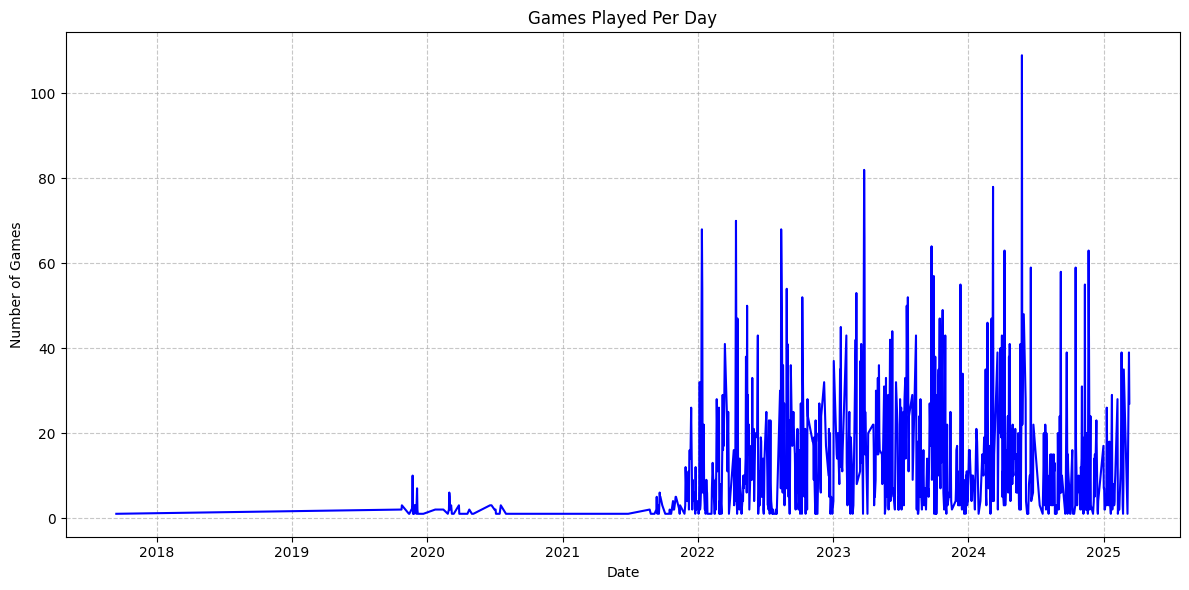

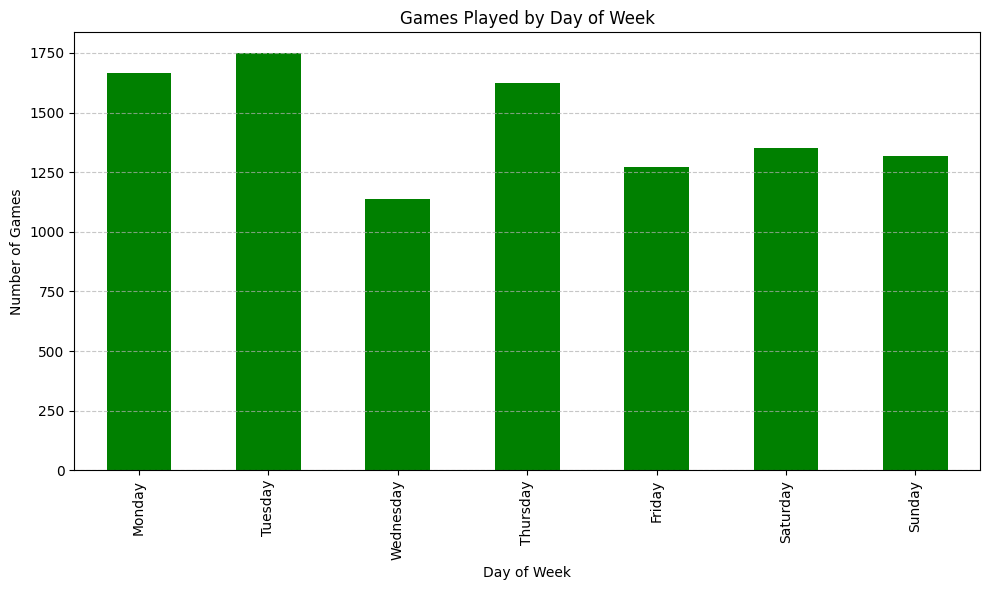

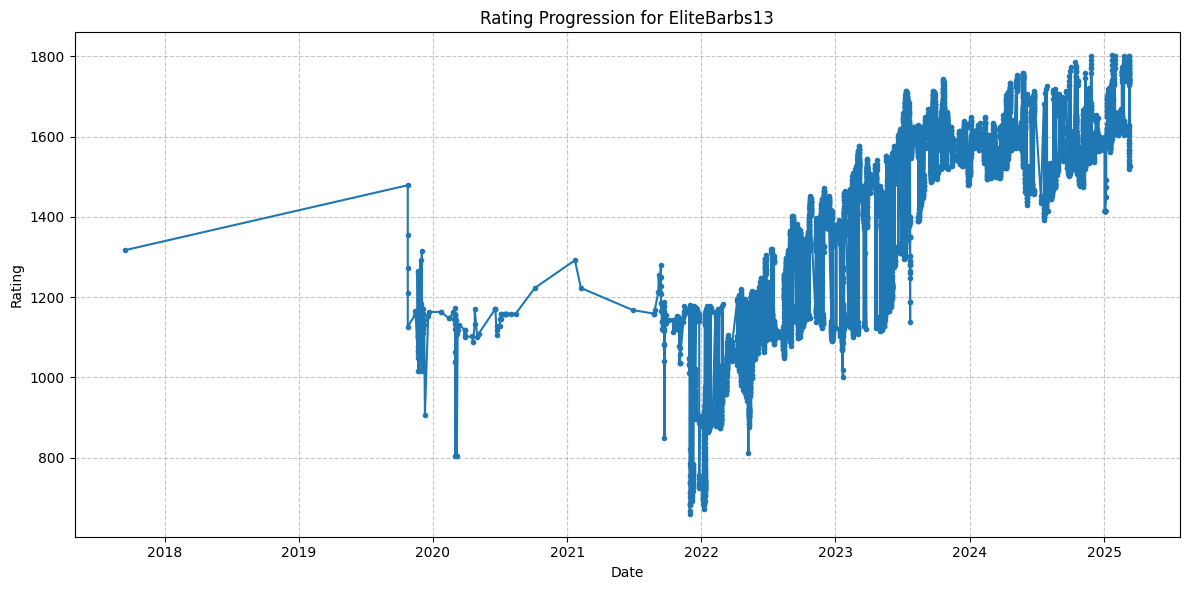

In [16]:
"""
Visualize trends over time
"""
if username:
        # Filter games where the player was white or black
        white_games = df[df['games/white/username'] == username]
        black_games = df[df['games/black/username'] == username]
        player_games = pd.concat([white_games, black_games])
        
        if len(player_games) == 0:
            print(f"\nNo games found for player: {username}")
            
        print(f"\n===== TIME TRENDS FOR {username} =====")
        analysis_df = player_games
else:
        print("\n===== TIME TRENDS (ALL GAMES) =====")
        analysis_df = df
    
    # Group games by date
games_by_date = analysis_df.groupby('date').size()
    
    # Plot games per day
plt.figure(figsize=(12, 6))
games_by_date.plot(kind='line', color='blue')
plt.title('Games Played Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Games')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('games_per_day.png')
print("Saved 'games_per_day.png'")
    
    # Group games by day of week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
games_by_day = analysis_df.groupby('day_of_week').size()
games_by_day.index = [day_names[i] for i in games_by_day.index]
    
    # Plot games by day of week
plt.figure(figsize=(10, 6))
ax = games_by_day.plot(kind='bar', color='green')
plt.title('Games Played by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Games')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.tight_layout()
plt.savefig('games_by_day_of_week.png')
print("Saved 'games_by_day_of_week.png'")
    
if username:
        # Rating over time
        white_ratings = white_games[['games/end_time', 'games/white/rating']].rename(
            columns={'games/white/rating': 'rating'})
        black_ratings = black_games[['games/end_time', 'games/black/rating']].rename(
            columns={'games/black/rating': 'rating'})
        
        all_ratings = pd.concat([white_ratings, black_ratings])
        all_ratings = all_ratings.sort_values('games/end_time')
        
        plt.figure(figsize=(12, 6))
        plt.plot(all_ratings['games/end_time'], all_ratings['rating'], marker='o', linestyle='-', markersize=3)
        plt.title(f'Rating Progression for {username}')
        plt.xlabel('Date')
        plt.ylabel('Rating')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.savefig('rating_progression.png')
        print("Saved 'rating_progression.png'")

Saved 'win_loss_draw_heatmap.png'
Saved 'correlation_heatmap.png'
Saved 'rating_distribution.png'


ValueError: Per-column arrays must each be 1-dimensional

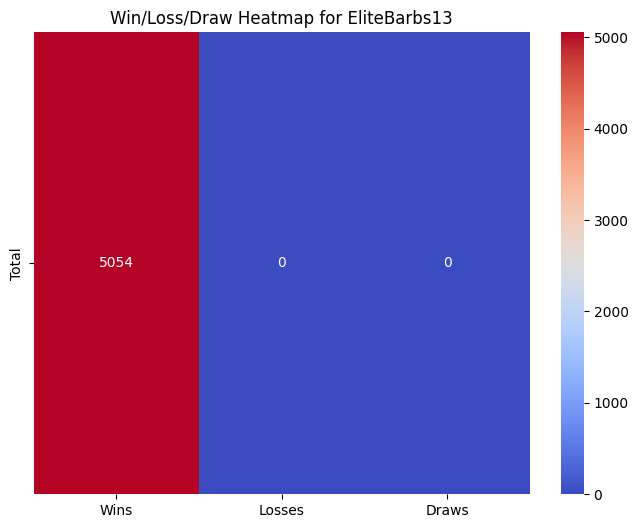

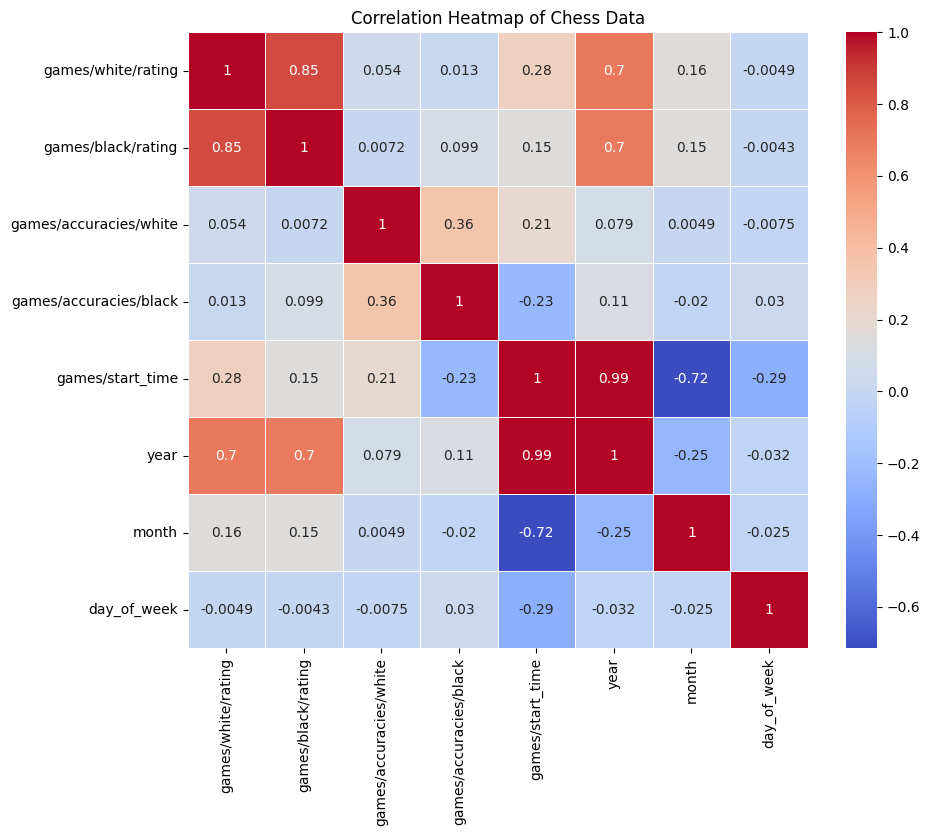

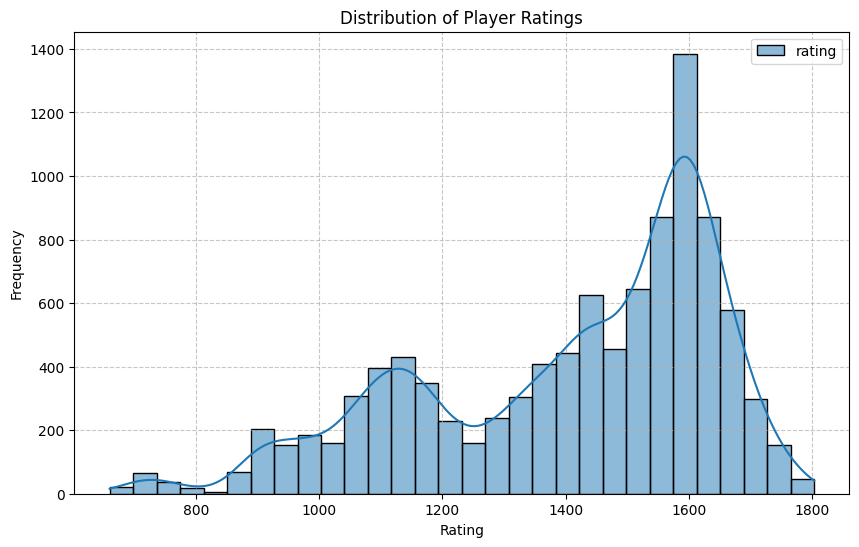

<Figure size 1400x600 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Heatmap of win/loss/draw distribution
plt.figure(figsize=(8, 6))
win_loss_draw = np.array([[total_wins, total_losses, total_draws]])
sns.heatmap(win_loss_draw, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Wins', 'Losses', 'Draws'], yticklabels=['Total'])
plt.title(f'Win/Loss/Draw Heatmap for {username}')
plt.savefig('win_loss_draw_heatmap.png')
print("Saved 'win_loss_draw_heatmap.png'")

# Correlation heatmap of numerical features
plt.figure(figsize=(10, 8))
numeric_columns = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(numeric_columns, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Chess Data')
plt.savefig('correlation_heatmap.png')
print("Saved 'correlation_heatmap.png'")

# Histogram of rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(all_ratings, bins=30, kde=True, color='blue')
plt.title('Distribution of Player Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('rating_distribution.png')
print("Saved 'rating_distribution.png'")

# Box plot of ratings by ECO opening
plt.figure(figsize=(14, 6))
sns.boxplot(x=df['games/eco'], y=np.concatenate([white_ratings, black_ratings]), palette='Set2')
plt.xticks(rotation=90)
plt.title('Rating Distribution by Chess Opening (ECO)')
plt.xlabel('ECO Code')
plt.ylabel('Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('rating_by_opening.png')
print("Saved 'rating_by_opening.png'")



NameError: name 'rating_counts' is not defined

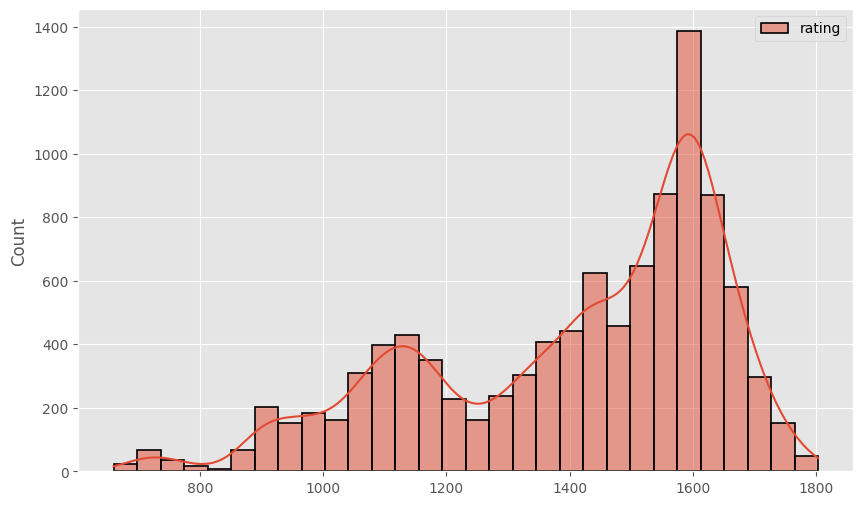

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Histogram of rating distribution with wins highlighted
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Spectral", n_colors=30)
hist_data = sns.histplot(all_ratings, bins=30, kde=True, color=colors[15], edgecolor='black', linewidth=1.2)

# Overlay wins in a different color
for bar, count, win_count in zip(hist_data.patches, rating_counts, win_counts):
    if win_count > 0:
        bar.set_color('blue')  # Highlight wins in blue

plt.title('Distribution of Player Ratings with Wins Highlighted', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Rating', fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='darkred')
plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot')
plt.savefig('rating_distribution.png')
print("Saved 'rating_distribution.png'")

Saved 'rating_distribution_with_wins.png'


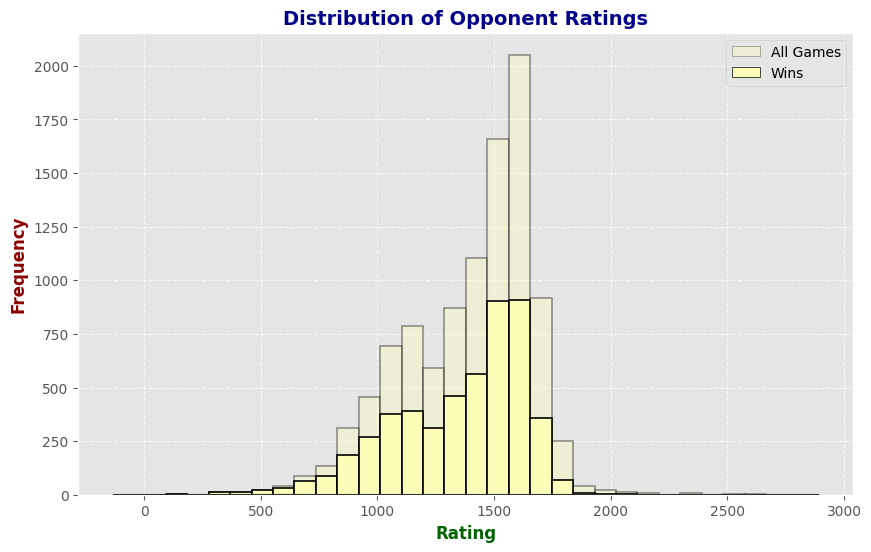

In [ ]:
# Extract opponent ratings and results
opponent_ratings = []
game_results = []

# When player is white, opponent is black
for _, game in white_games.iterrows():
    opponent_ratings.append(game['games/black/rating'])
    game_results.append(game['games/white/result'])  # 'win', 'loss', or 'draw'

# When player is black, opponent is white
for _, game in black_games.iterrows():
    opponent_ratings.append(game['games/white/rating'])
    game_results.append(game['games/black/result'])  # 'win', 'loss', or 'draw'

# Create DataFrame with opponent ratings and results
opponent_data = pd.DataFrame({
    'rating': opponent_ratings,
    'result': game_results
})

# Histogram of rating distribution with wins highlighted
plt.figure(figsize=(10, 6))
colors = sns.color_palette("Spectral", n_colors=30)

# Create histogram bins
bins = np.linspace(min(opponent_ratings), max(opponent_ratings), 31)
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_width = bins[1] - bins[0]

# Plot all opponent ratings histogram with spectral colors
n, bins, patches = plt.hist(opponent_ratings, bins=30, color=colors[15], edgecolor='black', linewidth=1.2)

# Extract the opponent ratings where player won
wins_ratings = opponent_data[opponent_data['result'] == 'win']['rating'].values

# Count wins per bin
win_counts = np.histogram(wins_ratings, bins=bins)[0]

# Plot only the wins portion with the same color but solid
for i, patch in enumerate(patches):
    if win_counts[i] > 0:
        plt.bar(bin_centers[i], win_counts[i], width=bin_width, color=colors[15],
                edgecolor='black', linewidth=1.2)
    # Set the alpha of the original patch to make it more transparent
    patch.set_alpha(0.4)

# Add a legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=colors[15], alpha=0.4, edgecolor='black', label='All Games'),
    Patch(facecolor=colors[15], edgecolor='black', label='Wins')
]
plt.legend(handles=legend_elements, loc='upper right')

# Add KDE line
kde_x = np.linspace(min(opponent_ratings), max(opponent_ratings), 1000)
kde = sns.kdeplot(opponent_ratings, color='black', linewidth=1.5)

plt.title('Distribution of Opponent Ratings', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Rating', fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='darkred')
plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot')
plt.savefig('rating_distribution_with_wins.png')
print("Saved 'rating_distribution_with_wins.png'")

Saved 'win_loss_draw_heatmap.png'
Saved 'correlation_heatmap.png'


NameError: name 'opponent_ratings' is not defined

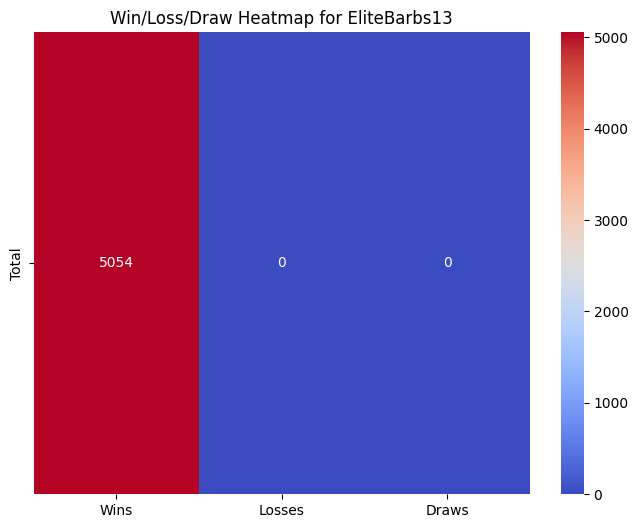

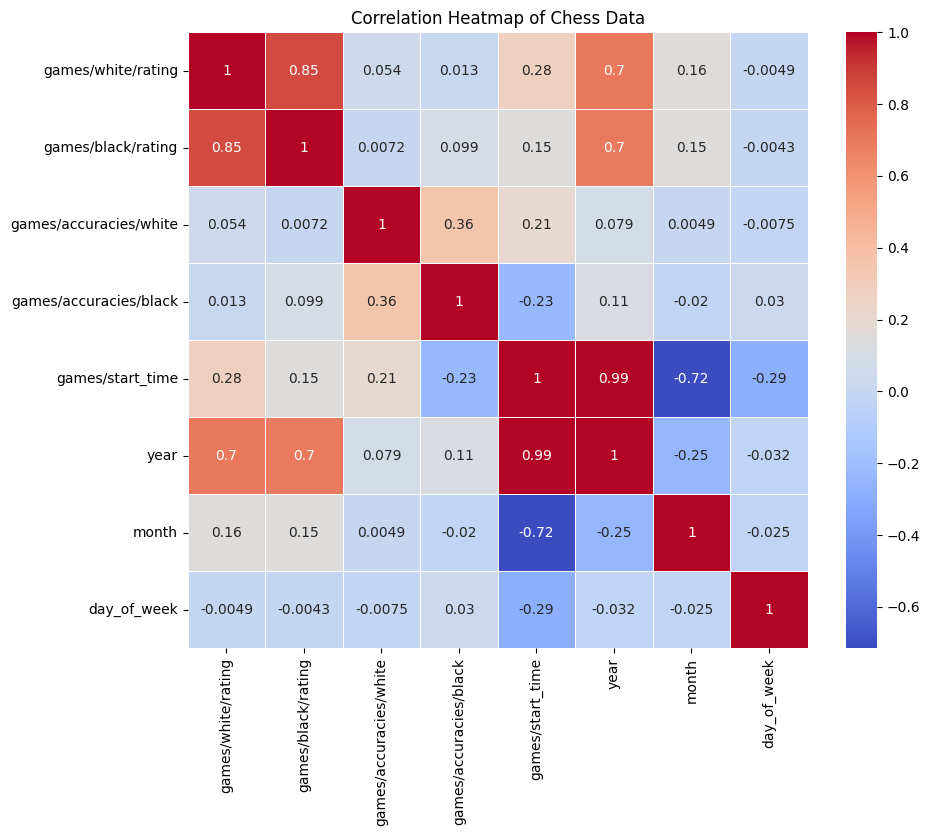

<Figure size 1000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Heatmap of win/loss/draw distribution
plt.figure(figsize=(8, 6))
win_loss_draw = np.array([[total_wins, total_losses, total_draws]])
sns.heatmap(win_loss_draw, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Wins', 'Losses', 'Draws'], yticklabels=['Total'])
plt.title(f'Win/Loss/Draw Heatmap for {username}')
plt.savefig('win_loss_draw_heatmap.png')
print("Saved 'win_loss_draw_heatmap.png'")

# Correlation heatmap of numerical features
plt.figure(figsize=(10, 8))
numeric_columns = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(numeric_columns, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Chess Data')
plt.savefig('correlation_heatmap.png')
print("Saved 'correlation_heatmap.png'")

# Histogram of rating distribution with wins highlighted
plt.figure(figsize=(10, 6))
colors = ['yellow', 'green']  # Yellow for all games, green for wins

# Create histogram bins
bins = np.linspace(min(opponent_ratings), max(opponent_ratings), 31)
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_width = bins[1] - bins[0]

# Plot all opponent ratings histogram in yellow
n, bins, patches = plt.hist(opponent_ratings, bins=30, color=colors[0], edgecolor='black', linewidth=1.2)

# Extract the opponent ratings where player won
wins_ratings = opponent_data[opponent_data['result'] == 'win']['rating'].values

# Count wins per bin
win_counts = np.histogram(wins_ratings, bins=bins)[0]

# Plot only the wins portion in green
for i, patch in enumerate(patches):
    if win_counts[i] > 0:
        plt.bar(bin_centers[i], win_counts[i], width=bin_width, color=colors[1], edgecolor='black', linewidth=1.2)
    patch.set_alpha(0.4)

# Add a legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=colors[0], alpha=0.4, edgecolor='black', label='All Games'),
    Patch(facecolor=colors[1], edgecolor='black', label='Wins')
]
plt.legend(handles=legend_elements, loc='upper right')

# Add KDE line
sns.kdeplot(opponent_ratings, color='black', linewidth=1.5)

plt.title('Distribution of Opponent Ratings', fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel('Rating', fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel('Frequency', fontsize=12, fontweight='bold', color='darkred')
plt.grid(True, linestyle='--', alpha=0.7)
plt.style.use('ggplot')
plt.savefig('rating_distribution_with_wins.png')
print("Saved 'rating_distribution_with_wins.png'")

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the chess data (replace with your file path if needed)
file_path = "/mnt/data/Main.ipynb"  # Adjust if needed
df = pd.read_json(file_path)

# Function to convert chess notation to matrix indices
def chess_square_to_index(square):
    file_to_index = {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7}
    rank_to_index = {'1': 7, '2': 6, '3': 5, '4': 4, '5': 3, '6': 2, '7': 1, '8': 0}
    
    if isinstance(square, str) and len(square) == 2:
        file, rank = square[0], square[1]
        return rank_to_index.get(rank, None), file_to_index.get(file, None)
    return None, None

# Initialize an 8x8 board heatmap
heatmap_data = np.zeros((8, 8))

# Extract all move positions
for game in df["moves"]:  # Assuming moves are stored in a column called "moves"
    for move in game.split():  # Assuming moves are space-separated
        row, col = chess_square_to_index(move)
        if row is not None and col is not None:
            heatmap_data[row, col] += 1

# Plot the heatmap
plt.figure(figsize=(8, 8))
ax = sns.heatmap(heatmap_data, cmap="Reds", linewidths=0.5, annot=True, fmt=".0f", cbar=True)

# Customize the heatmap appearance
ax.set_xticks(np.arange(8) + 0.5)
ax.set_yticks(np.arange(8) + 0.5)
ax.set_xticklabels(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
ax.set_yticklabels(['8', '7', '6', '5', '4', '3', '2', '1'])
plt.title("Piece Placement Heatmap")
plt.xlabel("File")
plt.ylabel("Rank")

# Save the heatmap
plt.savefig("chess_piece_heatmap.png")
print("Saved 'chess_piece_heatmap.png'")

plt.show()


C:\Users\marko\AppData\Local\Temp\ipykernel_14592\2341396067.py:8: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_json(file_path)


ValueError: Expected object or value